In [1]:
!pip install nltk

In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Set the NLTK data path if necessary
nltk.download('punkt_tab')

# Load the dataset
data = pd.read_csv('medicine.csv')

# Download necessary NLTK data
try:
    nltk.download('stopwords')
    nltk.download('punkt')
except Exception as e:
    print(f"Error downloading NLTK resources: {e}")

# Set of stopwords
stop_words = set(stopwords.words('english'))

# Data cleaning function
def clean_text(text):
    # Remove non-alphabetic characters and unnecessary symbols (e.g., Â)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'Â', '', text)  # Removing "Â" from some entries
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply the cleaning function to the 'Description' column
data['cleaned_description'] = data['Description'].apply(clean_text)

# Preview cleaned data
print(data.head())


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   index                                          Drug_Name Reason  \
0      1               A CN Gel(Topical) 20gmA CN Soap 75gm   Acne   
1      2  A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...   Acne   
2      3                             ACGEL CL NANO Gel 15gm   Acne   
3      4                                ACGEL NANO Gel 15gm   Acne   
4      5                              Acleen 1% Lotion 25ml   Acne   

                                         Description  \
0                      Mild to moderate acne (spots)   
1  A RET 0.025% is a prescription medicine that i...   
2  It is used to treat acne vulgaris in people 12...   
3  It is used to treat acne vulgaris in people 12...   
4  treat the most severe form of acne (nodular ac...   

                                 cleaned_description  
0                      [mild, moderate, acne, spots]  
1  [ret, 0025, prescription, medicine, used, redu...  
2  [used, treat, acne, vulgaris, people, 12, year...  
3  [used, treat, acne,

In [11]:
print(data['cleaned_description'])


0                           [mild, moderate, acne, spots]
1       [ret, 0025, prescription, medicine, used, redu...
2       [used, treat, acne, vulgaris, people, 12, year...
3       [used, treat, acne, vulgaris, people, 12, year...
4              [treat, severe, form, acne, nodular, acne]
                              ...                        
9715                              [used, treating, warts]
9716                          [used, soften, skin, cells]
9717                                        [used, scars]
9718                                       [used, wounds]
9719    [used, treat, remove, raised, warts, usually, ...
Name: cleaned_description, Length: 9720, dtype: object


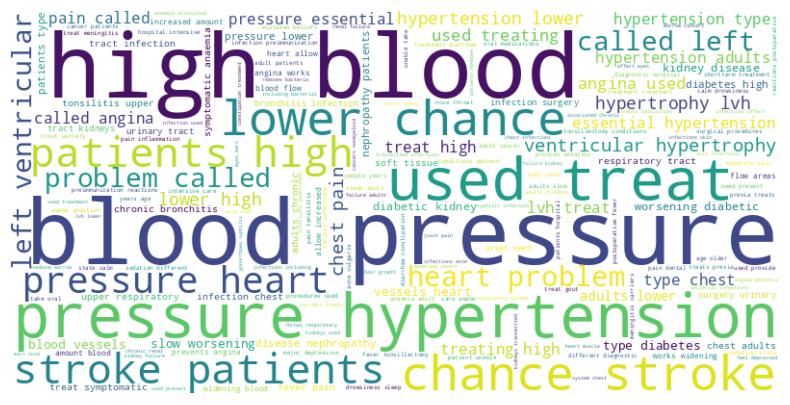

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the cleaned description list to get a single list of all words
all_words = [word for tokens in data['cleaned_description'] for word in tokens]
wordcloud_text = ' '.join(all_words)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


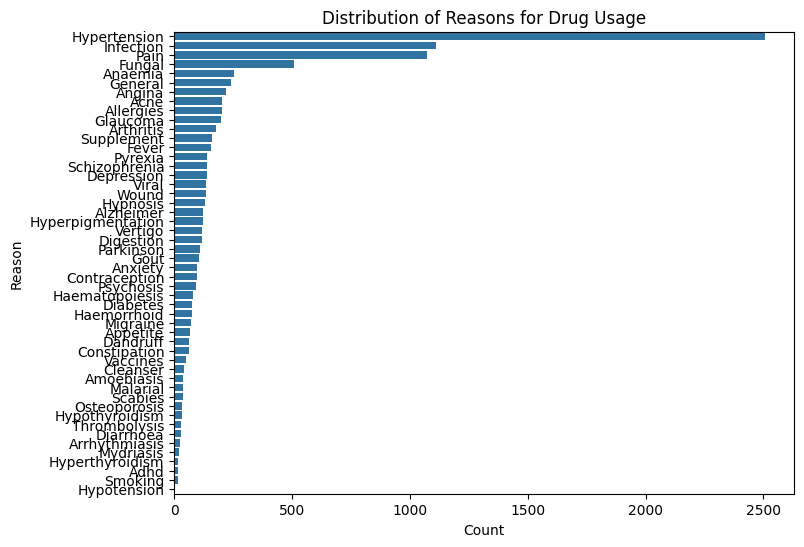

In [13]:
import seaborn as sns

# Plot the distribution of the 'Reason' column
plt.figure(figsize=(8, 6))
sns.countplot(y=data['Reason'], order=data['Reason'].value_counts().index)
plt.title('Distribution of Reasons for Drug Usage')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.show()


In [15]:
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/24.0 MB 5.6 MB/s eta 0:00:05
   --- ------------------------------------ 2.4/24.0 MB 5.6 MB/s eta 0:00:04
   ------- -------------------------------- 4.5/24.0 MB 7.3 MB/s eta 0:00:03
   ----------- ---------------------------- 6.8/24.0 MB 7.9 MB/s eta 0:00:03
   -------------- ------------------------- 8.7/24.0 MB 8.1 MB/s eta 0:00:02
   ----------------- ---------------------- 10.5/24.0 MB 8.3 MB/s eta 0:00:02
   -------------------- ------------------- 12.6/24.0 MB 8.6 MB/s eta 0:00:02
   ------------------------ --------------- 14.4/24.0 MB 8.6 MB/s eta 0:00:02
   --------------------------- ------------ 16.3/24.0 MB 8.7 MB/s eta 0:00:01
   ------------------------------ --------- 18.4/24.0 MB 8.7 MB/s eta 0:00:01
   --------------------------------- ------ 20.2/24.0 MB 8.8 MB/s eta 0:00:01
   ----------------------------------- ---- 21.5/24.0 MB 8.5 MB/s eta 0:00:01

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.11 requires protobuf<4,>=3.11, but you have protobuf 4.25.4 which is incompatible.
unimernet 0.1.6 requires matplotlib<4.0.0,>=3.8.4, but you have matplotlib 3.7.1 which is incompatible.
unimernet 0.1.6 requires transformers==4.40.0, but you have transformers 4.43.3 which is incompatible.


In [16]:
from gensim.models import Word2Vec

sentences = data['cleaned_description'].tolist()

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

model.save('word2vec.model')


                                             Drug_Name  \
284                      Allercrom Forte Eye Drops 5ml   
338                         Betawin LC 5mg Tablet 10'S   
251                              Alerfix M Tablet 15'S   
273                              ALL 3 5mg Tablet 10'S   
327  Avil 22.5mg Injection 10X2mlAvil 25mg Tablet 1...   

                Description  similarity  
284  Good for Allergic skin    0.795607  
338  Good for Allergic skin    0.795607  
251  Good for Allergic skin    0.795607  
273  Good for Allergic skin    0.795607  
327  Good for Allergic skin    0.795607  


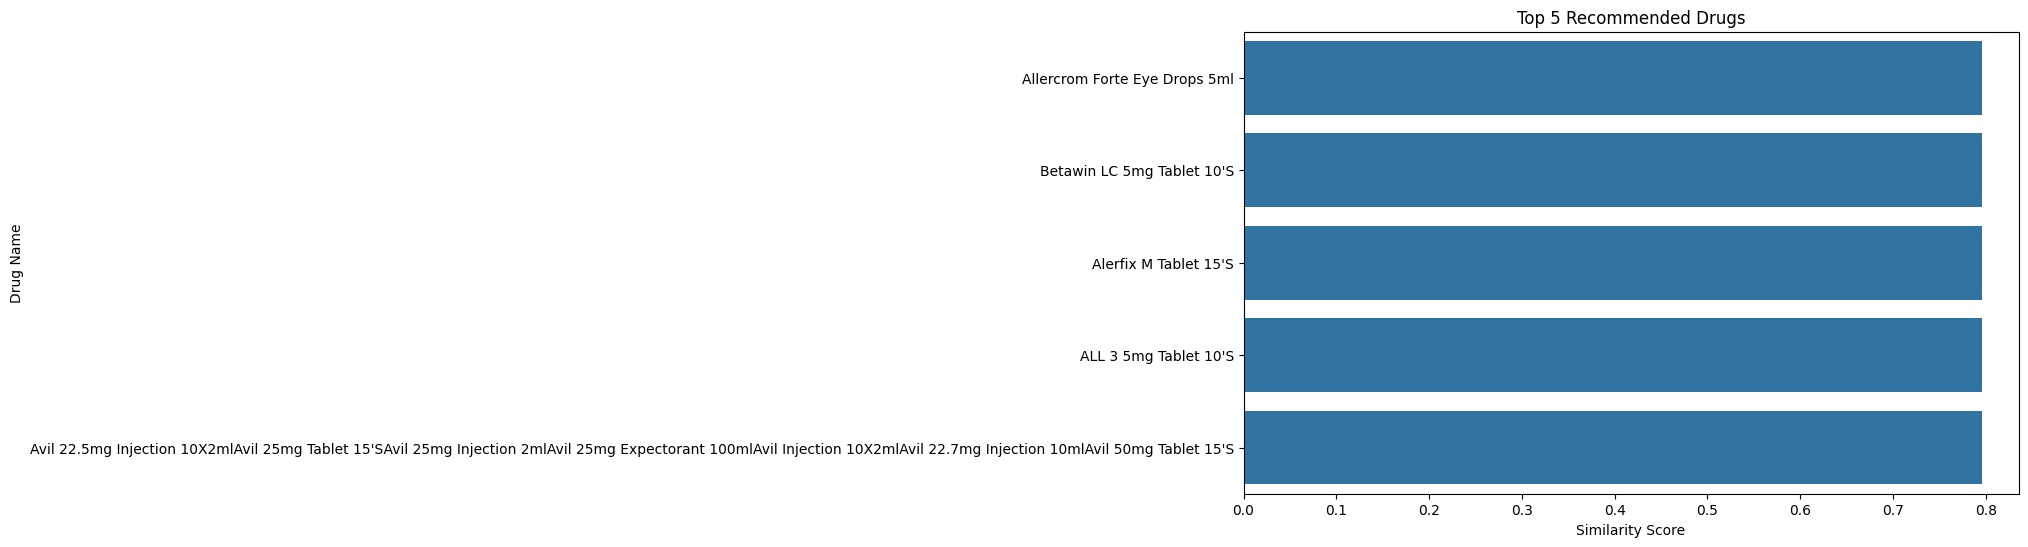

In [22]:
def find_similar_drugs(query, model, data):
    query_tokens = clean_text(query)
    similarities = []
    for idx, description in data['cleaned_description'].items():
        similarity = 0
        count = 0
        for token in query_tokens:
            if token in model.wv:
                for word in description:
                    if word in model.wv:
                        similarity += model.wv.similarity(token, word)
                        count += 1
        if count > 0:
            similarity /= count
        similarities.append(similarity)
        data['similarity'] = similarities
    recommended_drugs = data.sort_values(by='similarity', ascending=False).head(5)
    return recommended_drugs[['Drug_Name', 'Description', 'similarity']]

# Example usage
query = "dry skin"
recommended_drugs = find_similar_drugs(query, model, data)
print(recommended_drugs)
plt.figure(figsize=(10, 6))
sns.barplot(x='similarity', y='Drug_Name', data=recommended_drugs)
plt.title('Top 5 Recommended Drugs')
plt.xlabel('Similarity Score')
plt.ylabel('Drug Name')
plt.show()
